![The Pokémon Logo](images/pokemon-logo.png)

# **Introduction**

This project was brought on by my own curiosity into my hobby.  It kinda twisted and turned into an extrospective look on favorites in the Pokemon Trading Card Game; going from the question I first posed: "When is the best time to buy a card?" to, instead, "Does popularity affect the price of a card?  If so, how much?  If not, then how might it affect it?"

The data was gathered by me in a single sitting, loading in a random assortment of cards through my data scraper that I engineered to look up some cards and proliferate my database with.  I thought a sample size of 100+ would be adequate, so I set about typing in some random names that frequented the top of this list, as well as some other random cards given to me by my mentors, peers, and friends.  This scraper utilizes both Beautiful Soup and Selenium, the former for reading the HTML output of the chart that factors weekly prices, and the latter for all of the other dynamically-loaded elements.  Instructions on how to use this will be in the README.md.

These popularity rankings - granted, they're 5 years old - were taken from [Reddit](https://www.reddit.com/r/pokemon/comments/c0w4s0/favourite_pok%C3%A9mon_survey_results/).  They're limited to the Generations I - VII.  That is excluding the most recent release, Scarlet & Violet, as well as Sword & Shield.  A user by the name of [mamamia1001](https://www.reddit.com/user/mamamia1001) polled the community in the subreddit [/r/Pokemon](https://www.reddit.com/r/pokemon/) to the tune of more than 52,000 votes by their own estimates.  I'm not sure of their methodology sans the fact that they limited every account that voted to 1 per, but I took the poll at face value and carried on with the analysis, like I'm about to here:

#### Importing Necessary Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Data

There are two .csv's that I'll use for this project:

1. Historical Data from TCGPlayer (.csv)
2. Most Popular Pokemon Data (.csv)

In [74]:
# reading in the historical data
hist_df = pd.read_csv("tcgplayer-data.csv")

# showing the first five rows
hist_df.head()

,Card,Set,Number,Rarity,Condition,Volatility,3/18 to 3/24,3/25 to 3/31,4/1 to 4/7,4/8 to 4/14,...,1/6 to 1/12,1/13 to 1/19,1/20 to 1/26,1/27 to 2/2,2/3 to 2/9,2/10 to 2/16,2/17 to 2/23,2/24 to 3/2,3/3 to 3/9,3/10 to 3/16
0,Gengar VMAX,SWSH08: Fusion Strike,271/264,Secret Rare,Near Mint,Med Volatility,228.68,252.39,289.66,312.91,...,657.73,697.20,732.91,744.80,735.06,718.11,719.55,699.55,682.49,679.85
1,Gengar ex,SV05: Temporal Forces,193/162,Ultra Rare,Near Mint,Med Volatility,19.05,13.13,13.78,12.70,...,22.79,24.81,24.98,24.79,24.57,22.54,24.16,25.13,24.15,22.57
2,Gengar,SWSH11: Lost Origin Trainer Gallery,TG06/TG30,Ultra Rare,Near Mint,Med Volatility,2.47,2.57,2.98,2.35,...,10.22,13.40,16.17,15.35,15.00,15.59,19.98,18.98,17.25,16.61
3,Charizard,Base Set,004/102,Holo Rare,Near Mint,Med Volatility,385.66,386.97,370.05,369.79,...,442.48,427.29,406.44,441.24,440.18,378.71,398.63,449.77,453.59,462.27
4,Charizard GX,SM - Burning Shadows,150/147,Secret Rare,Near Mint,Indeterminate Volatility,397.94,397.94,413.30,413.30,...,420.70,411.27,414.50,414.50,414.50,416.27,423.25,423.90,418.99,418.99


In [75]:
# displaying the ENTIRE info of the historical prices data frame
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Card            253 non-null    object 
 1   Set             253 non-null    object 
 2   Number          253 non-null    object 
 3   Rarity          253 non-null    object 
 4   Condition       252 non-null    object 
 5   Volatility      253 non-null    object 
 6   3/18 to 3/24    253 non-null    float64
 7   3/25 to 3/31    253 non-null    float64
 8   4/1 to 4/7      253 non-null    float64
 9   4/8 to 4/14     253 non-null    float64
 10  4/15 to 4/21    253 non-null    float64
 11  4/22 to 4/28    253 non-null    float64
 12  4/29 to 5/5     253 non-null    float64
 13  5/6 to 5/12     253 non-null    float64
 14  5/13 to 5/19    253 non-null    float64
 15  5/20 to 5/26    253 non-null    float64
 16  5/27 to 6/2     253 non-null    float64
 17  6/3 to 6/9      253 non-null    flo

In [76]:
# reading in the popularity data
pop_df = pd.read_csv("pokemon-favorites-list.csv")

# showing the first five rows
pop_df.head()

,Pokemon,Number of votes,Rank
0,Charizard,1107,1
1,Gengar,1056,2
2,Arcanine,923,3
3,Bulbasaur,710,4
4,Blaziken,613,5


In [77]:
# displaying the info of the historical prices data frame
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Pokemon          809 non-null    object
 1   Number of votes  809 non-null    int64 
 2   Rank             809 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 19.1+ KB


#### Upkeep, Merging, and Cleaning Data

Upkeep:
*   Taking a look at both dateframes and getting rid of any columns that aren't going to factor into our analysis.
*   Rearranging columns if they need to be so that readability won't be an issue.
*   Converting title names for consistency
*   Renaming the 'Card' column to 'Pokemon'

In [78]:
print(hist_df.columns)  # remove 'Volatility'

Index(['Card', 'Set', 'Number', 'Rarity', 'Condition', 'Volatility',
       '3/18 to 3/24', '3/25 to 3/31', '4/1 to 4/7', '4/8 to 4/14',
       '4/15 to 4/21', '4/22 to 4/28', '4/29 to 5/5', '5/6 to 5/12',
       '5/13 to 5/19', '5/20 to 5/26', '5/27 to 6/2', '6/3 to 6/9',
       '6/10 to 6/16', '6/17 to 6/23', '6/24 to 6/30', '7/1 to 7/7',
       '7/8 to 7/14', '7/15 to 7/21', '7/22 to 7/28', '7/29 to 8/4',
       '8/5 to 8/11', '8/12 to 8/18', '8/19 to 8/25', '8/26 to 9/1',
       '9/2 to 9/8', '9/9 to 9/15', '9/16 to 9/22', '9/23 to 9/29',
       '9/30 to 10/6', '10/7 to 10/13', '10/14 to 10/20', '10/21 to 10/27',
       '10/28 to 11/3', '11/4 to 11/10', '11/11 to 11/17', '11/18 to 11/24',
       '11/25 to 12/1', '12/2 to 12/8', '12/9 to 12/15', '12/16 to 12/22',
       '12/23 to 12/29', '12/30 to 1/5', '1/6 to 1/12', '1/13 to 1/19',
       '1/20 to 1/26', '1/27 to 2/2', '2/3 to 2/9', '2/10 to 2/16',
       '2/17 to 2/23', '2/24 to 3/2', '3/3 to 3/9', '3/10 to 3/16'],
      dtype='o

In [79]:
print(pop_df.columns)   # remove 'Number of votes'

Index(['Pokemon', 'Number of votes', 'Rank'], dtype='object')


#### Card Data, Historical Prices, and Removal

General upkeep and renaming to prepare for a more seamless merger.  'Volatility' was a novel idea, but it seems like half of the cards have 'Indeterminate Volatility' and that doesn't help with our analysis in this case.  We'll be measuring our own volatility later.

Additionally, 'Condition' will not play much of a part as I've made it a habit to select only the best conditioned cards (i.e. Near Mint), especially for this database.  So, I'll remove that too.

In [80]:
hist_clean = hist_df.drop(columns = ["Condition", "Volatility"])    # removing the 'Condition' and 'Volatility' column

hist_clean.head()  

,Card,Set,Number,Rarity,3/18 to 3/24,3/25 to 3/31,4/1 to 4/7,4/8 to 4/14,4/15 to 4/21,4/22 to 4/28,...,1/6 to 1/12,1/13 to 1/19,1/20 to 1/26,1/27 to 2/2,2/3 to 2/9,2/10 to 2/16,2/17 to 2/23,2/24 to 3/2,3/3 to 3/9,3/10 to 3/16
0,Gengar VMAX,SWSH08: Fusion Strike,271/264,Secret Rare,228.68,252.39,289.66,312.91,314.11,349.01,...,657.73,697.20,732.91,744.80,735.06,718.11,719.55,699.55,682.49,679.85
1,Gengar ex,SV05: Temporal Forces,193/162,Ultra Rare,19.05,13.13,13.78,12.70,11.52,12.08,...,22.79,24.81,24.98,24.79,24.57,22.54,24.16,25.13,24.15,22.57
2,Gengar,SWSH11: Lost Origin Trainer Gallery,TG06/TG30,Ultra Rare,2.47,2.57,2.98,2.35,2.60,4.30,...,10.22,13.40,16.17,15.35,15.00,15.59,19.98,18.98,17.25,16.61
3,Charizard,Base Set,004/102,Holo Rare,385.66,386.97,370.05,369.79,360.99,323.85,...,442.48,427.29,406.44,441.24,440.18,378.71,398.63,449.77,453.59,462.27
4,Charizard GX,SM - Burning Shadows,150/147,Secret Rare,397.94,397.94,413.30,413.30,408.31,409.06,...,420.70,411.27,414.50,414.50,414.50,416.27,423.25,423.90,418.99,418.99


#### Cleaning and Renaming Popularity Rankings

More upkeep and removals...

In [81]:
pop_clean = pop_df.drop(columns = ["Number of votes"])  # removing the 'Number of votes' column
pop_clean.rename(columns = {"Rank": "Popularity"}, inplace = True)  # renaming 'Rank' to 'Popularity Ranking' for clarity

pop_clean.head()

,Pokemon,Popularity
0,Charizard,1
1,Gengar,2
2,Arcanine,3
3,Bulbasaur,4
4,Blaziken,5


In [82]:
# displaying the popularity info
pop_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pokemon     809 non-null    object
 1   Popularity  809 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.8+ KB


#### Data Consistency

Cards come from different sets, eras, and as such have different gimmicks.  Every other column, however, is distinct thanks to the web scraper and foresight.  The popular column only has a few changes that're needed.

That being said, we do have missing values for cards that were released in the last 52 weeks.  We will change those to 'NULL' to avoid price inaccuracies that affect our data as we graph it.

In [83]:
# replacing '0.00' with null values in the 'Price' column
hist_clean.replace(0.0, np.nan, inplace = True)

# checking for card 'Number' '238/191', which is a Pikachu from a set that released late last year to check if our change worked
hist_clean.loc[hist_clean["Number"] == "238/191"]

,Card,Set,Number,Rarity,3/18 to 3/24,3/25 to 3/31,4/1 to 4/7,4/8 to 4/14,4/15 to 4/21,4/22 to 4/28,...,1/6 to 1/12,1/13 to 1/19,1/20 to 1/26,1/27 to 2/2,2/3 to 2/9,2/10 to 2/16,2/17 to 2/23,2/24 to 3/2,3/3 to 3/9,3/10 to 3/16
79,Pikachu ex,SV08: Surging Sparks,238/191,Special Illustration Rare,NaN,NaN,NaN,NaN,NaN,NaN,...,476.18,485.95,474.56,468.81,461.43,457.9,456.22,456.14,442.02,442.08


#### Final Preparations to Merge

The Data is still pretty dirty on the names of the cards themselves despite letters (ex, GX, etc.) being descriptive.  It makes it very hard to apply their popularity rankings, so we're going to split and explode on the 'Card' column, and rename the 'Card' in preparation for our merger.

In [84]:
# we split the text in the cells on whitespace, then explode
hist_expand = hist_clean.assign(Card = hist_clean["Card"].str.split()).explode("Card", ignore_index = True)

# renaming 'Card' to 'Pokemon'
hist_expand.rename(columns = {"Card": "Pokemon"}, inplace = True)

hist_expand.head()

,Pokemon,Set,Number,Rarity,3/18 to 3/24,3/25 to 3/31,4/1 to 4/7,4/8 to 4/14,4/15 to 4/21,4/22 to 4/28,...,1/6 to 1/12,1/13 to 1/19,1/20 to 1/26,1/27 to 2/2,2/3 to 2/9,2/10 to 2/16,2/17 to 2/23,2/24 to 3/2,3/3 to 3/9,3/10 to 3/16
0,Gengar,SWSH08: Fusion Strike,271/264,Secret Rare,228.68,252.39,289.66,312.91,314.11,349.01,...,657.73,697.20,732.91,744.80,735.06,718.11,719.55,699.55,682.49,679.85
1,VMAX,SWSH08: Fusion Strike,271/264,Secret Rare,228.68,252.39,289.66,312.91,314.11,349.01,...,657.73,697.20,732.91,744.80,735.06,718.11,719.55,699.55,682.49,679.85
2,Gengar,SV05: Temporal Forces,193/162,Ultra Rare,19.05,13.13,13.78,12.70,11.52,12.08,...,22.79,24.81,24.98,24.79,24.57,22.54,24.16,25.13,24.15,22.57
3,ex,SV05: Temporal Forces,193/162,Ultra Rare,19.05,13.13,13.78,12.70,11.52,12.08,...,22.79,24.81,24.98,24.79,24.57,22.54,24.16,25.13,24.15,22.57
4,Gengar,SWSH11: Lost Origin Trainer Gallery,TG06/TG30,Ultra Rare,2.47,2.57,2.98,2.35,2.60,4.30,...,10.22,13.40,16.17,15.35,15.00,15.59,19.98,18.98,17.25,16.61


#### Merging Dataframes

With the newly exploded historical dataframe, we're going to merge on 'Pokemon', and then apply the rankings to the card names themselves.  Afterward, we'll drop the rows without rankings, round out the numbers so they're not of the type 'float64' anymore, sort them, and reset our index.

In [85]:
# left-joining on hist_clean and creating a new merged dataframe; I was getting an error 
final_df = hist_expand.merge(pop_clean, on = "Pokemon", how = "left")

# drop rows that have 'NaN' in the 'Popularity' column
final_df = final_df.dropna(subset = "Popularity")

# change from float to int for better presentation (1.0 to 1)
final_df["Popularity"] = final_df["Popularity"].astype("Int64")

# reordering the 'Popularity" column to be second 
pop_move = final_df.pop("Popularity") # 'popping' it out
final_df.insert(1, "Popularity", pop_move) # moving it to the 2 column
final_df = final_df.sort_values(by = "Popularity") # simple sort statement

final_df.head()

# reset index
final_df.reset_index(drop = True, inplace = True)

final_df.info()
final_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pokemon         247 non-null    object 
 1   Popularity      247 non-null    Int64  
 2   Set             247 non-null    object 
 3   Number          247 non-null    object 
 4   Rarity          247 non-null    object 
 5   3/18 to 3/24    240 non-null    float64
 6   3/25 to 3/31    241 non-null    float64
 7   4/1 to 4/7      241 non-null    float64
 8   4/8 to 4/14     241 non-null    float64
 9   4/15 to 4/21    241 non-null    float64
 10  4/22 to 4/28    242 non-null    float64
 11  4/29 to 5/5     243 non-null    float64
 12  5/6 to 5/12     244 non-null    float64
 13  5/13 to 5/19    244 non-null    float64
 14  5/20 to 5/26    244 non-null    float64
 15  5/27 to 6/2     244 non-null    float64
 16  6/3 to 6/9      244 non-null    float64
 17  6/10 to 6/16    244 non-null    flo

,Pokemon,Popularity,Set,Number,Rarity,3/18 to 3/24,3/25 to 3/31,4/1 to 4/7,4/8 to 4/14,4/15 to 4/21,...,1/6 to 1/12,1/13 to 1/19,1/20 to 1/26,1/27 to 2/2,2/3 to 2/9,2/10 to 2/16,2/17 to 2/23,2/24 to 3/2,3/3 to 3/9,3/10 to 3/16
0,Charizard,1,Base Set,004/102,Holo Rare,385.66,386.97,370.05,369.79,360.99,...,442.48,427.29,406.44,441.24,440.18,378.71,398.63,449.77,453.59,462.27
1,Charizard,1,SM - Burning Shadows,150/147,Secret Rare,397.94,397.94,413.30,413.30,408.31,...,420.70,411.27,414.50,414.50,414.50,416.27,423.25,423.90,418.99,418.99
2,Charizard,1,Shining Fates: Shiny Vault,SV107/SV122,Shiny Holo Rare,84.43,80.23,80.97,81.75,81.90,...,110.25,112.29,114.88,115.31,116.20,118.64,119.03,119.82,122.07,120.90
3,Charizard,1,Base Set,004/102,Holo Rare,94.61,95.28,94.97,95.41,95.07,...,117.74,117.57,124.11,125.22,131.54,136.95,138.45,137.53,138.66,141.42
4,Charizard,1,XY - Flashfire,107/106,Secret Rare,NaN,31.98,31.98,31.99,31.99,...,31.14,31.14,34.28,34.28,34.28,34.28,34.28,34.28,34.28,34.28
5,Charizard,1,SV03: Obsidian Flames,223/197,Special Illustration Rare,44.67,42.59,44.62,45.57,43.88,...,75.83,71.22,72.60,67.28,71.71,74.75,62.91,67.75,65.28,65.73
6,Charizard,1,Legendary Treasures,19/113,Holo Rare,28.28,28.85,28.70,28.63,28.63,...,31.23,31.67,31.79,32.63,32.63,32.53,32.53,32.53,32.72,32.72
7,Charizard,1,SWSH03: Darkness Ablaze,020/189,Ultra Rare,25.87,26.50,24.71,24.42,24.29,...,32.20,30.43,33.54,37.08,38.72,41.40,42.35,42.35,41.74,41.65
8,Charizard,1,SWSH11: Lost Origin Trainer Gallery,TG03/TG30,Ultra Rare,3.24,3.97,2.77,3.25,4.12,...,10.56,12.12,12.55,13.34,13.67,13.39,13.25,12.63,12.13,12.25
9,Gengar,2,SV05: Temporal Forces,193/162,Ultra Rare,19.05,13.13,13.78,12.70,11.52,...,22.79,24.81,24.98,24.79,24.57,22.54,24.16,25.13,24.15,22.57


#### Calculate New Values

Now, we'll take some normal financial calculations and numbers for later use in calculations and begin our analysis.

In [86]:
# matching on '/' and 'to' to group columns together for easier calculations
yr_prices = [col for col in final_df.columns if '/' in col and 'to' in col]

# given that we previously changes some values of '0' to 'NaN', we will use NumPy to properly calculate:
pricing_data = final_df[yr_prices].to_numpy()

# taking traditional price stats
final_df["Average"] = np.round(np.mean(pricing_data, axis = 1), 2) # rounding to 2 decimal places with numpy
final_df["Min"] = final_df[yr_prices].min(axis = 1)
final_df["Max"] = final_df[yr_prices].max(axis = 1)
final_df["Range"] = final_df["Max"] - final_df["Min"]

final_df.head(10)

,Pokemon,Popularity,Set,Number,Rarity,3/18 to 3/24,3/25 to 3/31,4/1 to 4/7,4/8 to 4/14,4/15 to 4/21,...,2/3 to 2/9,2/10 to 2/16,2/17 to 2/23,2/24 to 3/2,3/3 to 3/9,3/10 to 3/16,Average,Min,Max,Range
0,Charizard,1,Base Set,004/102,Holo Rare,385.66,386.97,370.05,369.79,360.99,...,440.18,378.71,398.63,449.77,453.59,462.27,383.34,323.85,462.27,138.42
1,Charizard,1,SM - Burning Shadows,150/147,Secret Rare,397.94,397.94,413.30,413.30,408.31,...,414.50,416.27,423.25,423.90,418.99,418.99,422.71,397.94,439.93,41.99
2,Charizard,1,Shining Fates: Shiny Vault,SV107/SV122,Shiny Holo Rare,84.43,80.23,80.97,81.75,81.90,...,116.20,118.64,119.03,119.82,122.07,120.90,91.34,74.14,122.07,47.93
3,Charizard,1,Base Set,004/102,Holo Rare,94.61,95.28,94.97,95.41,95.07,...,131.54,136.95,138.45,137.53,138.66,141.42,103.99,81.56,141.42,59.86
4,Charizard,1,XY - Flashfire,107/106,Secret Rare,NaN,31.98,31.98,31.99,31.99,...,34.28,34.28,34.28,34.28,34.28,34.28,NaN,30.53,40.99,10.46
5,Charizard,1,SV03: Obsidian Flames,223/197,Special Illustration Rare,44.67,42.59,44.62,45.57,43.88,...,71.71,74.75,62.91,67.75,65.28,65.73,53.84,39.65,85.46,45.81
6,Charizard,1,Legendary Treasures,19/113,Holo Rare,28.28,28.85,28.70,28.63,28.63,...,32.63,32.53,32.53,32.53,32.72,32.72,30.51,28.28,32.72,4.44
7,Charizard,1,SWSH03: Darkness Ablaze,020/189,Ultra Rare,25.87,26.50,24.71,24.42,24.29,...,38.72,41.40,42.35,42.35,41.74,41.65,27.06,20.46,42.35,21.89
8,Charizard,1,SWSH11: Lost Origin Trainer Gallery,TG03/TG30,Ultra Rare,3.24,3.97,2.77,3.25,4.12,...,13.67,13.39,13.25,12.63,12.13,12.25,6.64,2.77,13.67,10.90
9,Gengar,2,SV05: Temporal Forces,193/162,Ultra Rare,19.05,13.13,13.78,12.70,11.52,...,24.57,22.54,24.16,25.13,24.15,22.57,15.16,9.10,25.13,16.03


***

First thing that any Pokemon TCG hobbyist will tell you, if prompted, is that the relationship between popularity and high prices isn't as tight as one would be lead to believe.  This isn't to mention that there's just far too many rarities to truly quantify, but I thought it was worth the mention considering that's how pricing usually works in the real world.

I purposefully web scraped some cheaper versions of the more mundane favorites, while still keeping their rarities and found that the cost was never along the Pokemon-Rarity relationship.  Rather, it was just the rarity themselves.  The card art would best be applicable, but that kind of data is outside the scope of this analysis for the time being.

***

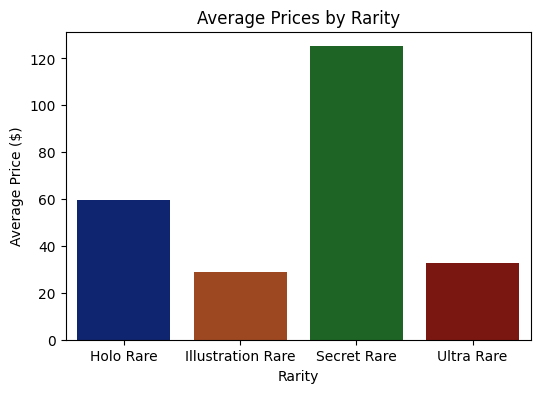

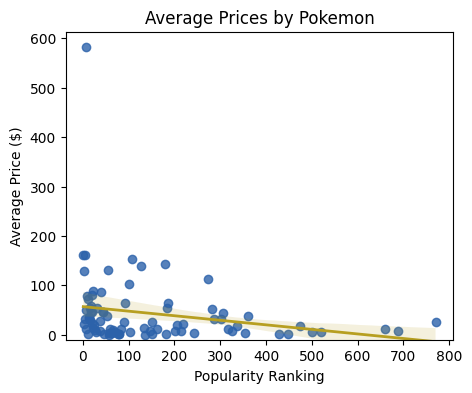

In [87]:
# gathering up rarities since we can't pass a str
rarities = ["Secret Rare", "Ultra Rare", "Illustration Rare", "Holo Rare"]
filter_on_rarities = final_df[final_df["Rarity"].isin(rarities)] # pulling all of them

# then we'll group them up and average them out
avg_rarity = filter_on_rarities.groupby("Rarity")["Average"].mean().reset_index()

plt.figure(figsize = (6, 4)) # making graphs a little more compact than (10, 6)
sns.barplot( # setting the axes, the data to pull from, and the palette to make it more presentable
    x = "Rarity",
    y = "Average",
    data = avg_rarity,
    hue = "Rarity",
    palette = "dark"
    )

plt.title("Average Prices by Rarity")
plt.xlabel("Rarity")
plt.ylabel("Average Price ($)")
plt.show()

# now we'll also add a boxplot to show that Pokemon and their popularity don't wholly push their prices alone
# setting up
avg_pokemon = filter_on_rarities.groupby("Popularity")["Average"].mean().reset_index()

plt.figure(figsize = (5, 4))
sns.regplot(
    x = "Popularity",
    y = "Average",
    data = avg_pokemon,
    scatter_kws = {"color": "#2c62aa"},
    line_kws = {"color": "#b79f21", "lw": 2}
)

plt.title("Average Prices by Pokemon")
plt.xlabel("Popularity Ranking")
plt.ylabel("Average Price ($)")
plt.ylim(-10, None) # trend line had made it seem as though some cards were in the negative, so I limited just enough for the x-axis to not clash with the marks
plt.show()

***

So, while the the price might not be as tightly wound to the Pokemon in the card itself, there is very much a negative correlation between them.  It's just not as indicative as the rarity **joined** with the popular Pokemon.  I don't think it takes someone well-versed in the market itself to understand that companies will make cards of higher rarity for those specific Pokemon.  This was a test of that and, on its face, it seems true enough, but there are more tests we can try.

On that note, next in-line are the 'Popularity'-centric metrics and how we can infer from those.  Since, in this analysis, t'would seem that rarity plays a much bigger part in assigning prices to cards.  That being said, maybe we can see how volatile some of the more popular Pokemon are and how their prices fluctuate.

**Price-to-Popularity Ratio** (*PPR*): Since 'lower' ranks (i.e. '1'st for Charizard, '2'nd for Gengar, and so on) means that a card is more popular, we can highlight that and see if these cards truly do command a higher premium through the PPR:

$$PPR = \frac{Average Price}{Popularity}$$

**Popularity-Adjusted Volatility** (*PAV*): Price volatility is another avenue concerning popularity that we can check to determine if it differs since we've already figured out that the price isn't tremendously motivated by 'Popularity' alone.

$$PAV = \frac{Range (max - min)}{Popularity}$$

***

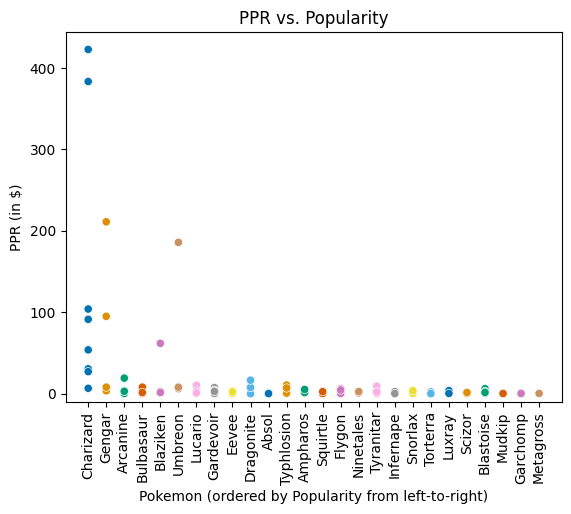

Text(0, 0.5, 'PAV (in $)')

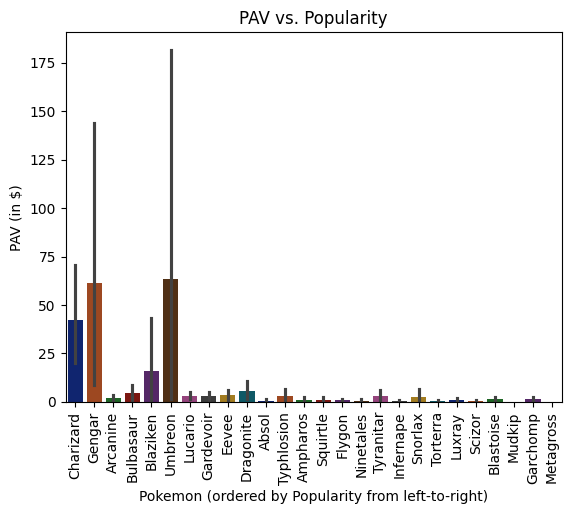

In [90]:
# setting up our variables and narrowing down to the top 25
final_df["PPR"] = final_df["Average"] / final_df["Popularity"]
final_df["PAV"] = final_df["Range"] / final_df["Popularity"]
top_25 = final_df[final_df["Popularity"] <= 26]

# making our PPR graph
sns.scatterplot(
    x = "Pokemon",
    y = "PPR",
    data = top_25, # using our new 'top_25' restriction
    hue = "Pokemon",
    palette = "colorblind",
    legend = False
)

plt.title("PPR vs. Popularity")
plt.xlabel("Pokemon (ordered by Popularity from left-to-right)")
plt.xticks(rotation = 90)
plt.ylabel("PPR (in $)")
plt.ylim(-10, None) # same as above
plt.show() 

# creating our PAV graph
sns.barplot(
    x = "Pokemon",
    y = "PAV",
    data = top_25,
    hue = "Pokemon",
    palette = "dark"
)

plt.title("PAV vs. Popularity")
plt.xlabel("Pokemon (ordered by Popularity from left-to-right)")
plt.xticks(rotation = 90)
plt.ylabel("PAV (in $)")

***

#### Data Interpretation:

As a collector, there are three names I know all too well: Charizard, Gengar, and Umbreon.  This list is 5 years old, but nevertheless, it seems rather glaring that of the 25 most popular cards, those three are the most expensive and each by orders of magnitude more than every other card combined.They've had many chase cards ('chase' just means they're very sought after) in recent expansions.

All-in-all, I would say that while Popularity affects how many cards are made which we couldn't explore here, I will definitely say that the biggest motivating factor isn't Pokemon on the card itself, but multitudinous factors.  Chiefly, the rarity itself as seen in the average price of certain rarities.  Even the vintage 'Holo Rare' tag was no match for the current iteration of that very same Pokemon on a newer card.

In the second graphic, we looked at a scatterplot with every card in the database and though the lower ranked cards were sparse.  The line of regression showed a more downward trend but only marginally so.  I think its slant actually had more to do with there being a few cards that're just so wildly expensive that it tilted the balance, literally.

And the third and fourth graphics spoke to more of the same thing, with the two values we created from the 'Popularity' (PPR and PAV) metric showing similar trends for the other and lending credance to what my take was from this whole analytic assignment: that popularity is more of a multiplier as shown in the volatility of the cards themselves, spiking some to astronomical values.  So, the volatility can at least be attributed to the more popular cards.  Granted, this is a very rudimentary take on a complex market, but the data shows that while 'Popularity' certainly helps a card's value, it also helps with the volatility.

#### Limitations:

* The scope of this project was incredibly condensed in both scope and returns.  A more robust and automated web scraper, as well as a more recent popularity poll would yield greater findings and lend more solidarity with my interpretations.
* The metrics that we used.  While they were both descriptive and helpful, I firmly believe if I had deeper knowledge of formulas and market behavior, I could craft a more succinct, palatable, and better analysis.
* This goes hand-in-hand with what I spoke of in relation to my understanding of finance and markets, but: my coding skill.  If I could've automated the web scraper, this could've been a much more in-depth search to finding better data.

#### Future Recommendations:

* A better web scraper and more time to scrape data.  Manually inputting URLs instead of automating a collection method is #1 on my to-do list as you'll find below.
* Find metrics that can more adequately describe the relationship between Popularity-Rarity and the card itself.
* There's more that we can add to this to figure out what best contributes to a card's wealth.  A column of interest in the future is 'Illustrator' for the artists who draw the pictures in the cards themselves.

In [89]:
# TODO: Automate web scraper.
# TODO: Gather larger sample of cards (1000+)
# TODO: More market research